FIRST HOME OWNER GRANT (FHOG)

In [1]:
#import dependancies
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import datetime

#import csv files
file1= ("fhog-grants-application1.csv")
file2= ("fhog-grants-paid1.csv")

In [2]:
#read csv file 1
fhog_application = pd.read_csv(file1)

#read csv file 2
fhog_paid = pd.read_csv(file2)

In [3]:
#merge the two data frames 
combinedata = pd.merge(fhog_application, fhog_paid, on="Date", how="outer")
combinedata.head()

,Date,Established Homes_x,New Dwellings,Total_x,Established Homes_y,New Houses and Land,Total_y
0,1/10/2018,5,573,578,0,543,543
1,1/11/2018,9,521,530,0,478,478
2,1/12/2018,0,404,404,2,348,350
3,1/01/2019,5,421,426,0,433,433
4,1/02/2019,4,434,438,0,408,408


In [4]:
#rename the columns
combineddata=combinedata.rename(columns={"Established Homes_x": "Established Homes App", "New Dwellings": "New Dwellings App", "Total_x": "Total App", "Established Homes_y": "Established Homes Paid", "New Houses and Land" : "New Dwellings Paid", "Total_y":"Total Paid"})
combineddata.head()

,Date,Established Homes App,New Dwellings App,Total App,Established Homes Paid,New Dwellings Paid,Total Paid
0,1/10/2018,5,573,578,0,543,543
1,1/11/2018,9,521,530,0,478,478
2,1/12/2018,0,404,404,2,348,350
3,1/01/2019,5,421,426,0,433,433
4,1/02/2019,4,434,438,0,408,408


In [5]:
#add column with year and quarter
combineddata['Date'] = pd.to_datetime(combineddata['Date'], format="%d/%m/%Y")
combineddata = combineddata.groupby(pd.PeriodIndex(combineddata['Date'],freq="Q")).sum()
combineddata

,Established Homes App,New Dwellings App,Total App,Established Homes Paid,New Dwellings Paid,Total Paid
Date,,,,,,
2018Q4,14,1498,1512,2,1369,1371
2019Q1,12,1298,1310,0,1313,1313
2019Q2,9,1404,1413,0,1405,1405
2019Q3,0,1394,1394,0,1396,1396
2019Q4,0,1491,1491,0,1254,1254
2020Q1,0,1462,1462,0,1347,1347
2020Q2,0,1388,1388,0,1312,1312


In [6]:
combineddata.to_csv("FHOG Dataframe.csv")

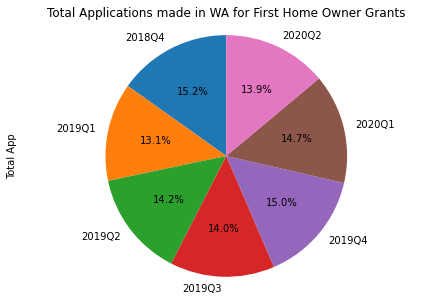

<Figure size 432x288 with 0 Axes>

In [22]:
pie1 = combineddata["Total App"]

plt.figure()
explode=(0,0,0,0,0,0,0)
pie1.plot(kind="pie", explode=explode, autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.axis("equal")
plt.title("Total Applications made in WA for First Home Owner Grants")
plt.show()
plt.savefig("FHOG Pie Chart Applications Made Per Quarter")

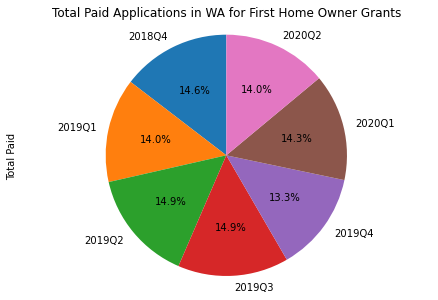

<Figure size 432x288 with 0 Axes>

In [23]:
pie2 = combineddata["Total Paid"]

plt.figure()
explode=(0,0,0,0,0,0,0)
pie2.plot(kind="pie", explode=explode, autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.axis("equal")
plt.title("Total Paid Applications in WA for First Home Owner Grants")
plt.show()
plt.savefig("FHOG Pie Chart Applications Paid Per Quarter")

In [24]:
#bar graphs
totals_dataframe=combineddata[["Total App", "Total Paid"]]
totals_dataframe

,Total App,Total Paid
Date,,
2018Q4,1512,1371
2019Q1,1310,1313
2019Q2,1413,1405
2019Q3,1394,1396
2019Q4,1491,1254
2020Q1,1462,1347
2020Q2,1388,1312


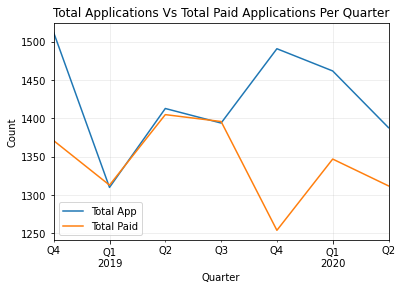

In [34]:
#labels = ["2018 Q4", "2019 Q1", "2019 Q2", "2019 Q3", "2019 Q4", "2020 Q1", "2020 Q2"]
totals_dataframe.plot()
plt.xlabel("Quarter")
plt.ylabel("Count")
plt.title("Total Applications Vs Total Paid Applications Per Quarter")
plt.legend(loc="best")
plt.grid(alpha=0.25)
plt.savefig("Linegraph-Total App Vs Total Paid Per Quarter")

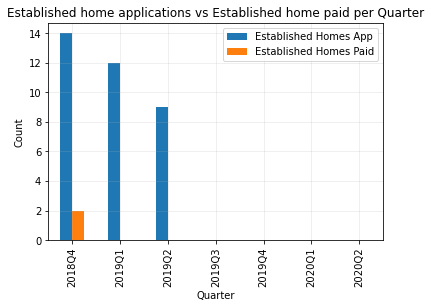

In [42]:
est_homes_dataframe=combineddata[["Established Homes App", "Established Homes Paid"]]
est_homes_dataframe.plot.bar()
plt.title("Established home applications vs Established home paid per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Count")
plt.grid(alpha=0.25)
plt.savefig("Bar Graph-Established Homes")

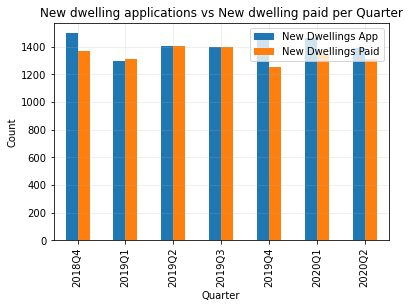

In [43]:
new_homes_dataframe=combineddata[["New Dwellings App", "New Dwellings Paid"]]
new_homes_dataframe.plot.bar()
plt.xlabel("Quarter")
plt.ylabel("Count")
plt.legend(loc="best")
plt.grid(alpha=0.25)
plt.title("New dwelling applications vs New dwelling paid per Quarter")
plt.savefig("Bar Graph-New Dwellings")

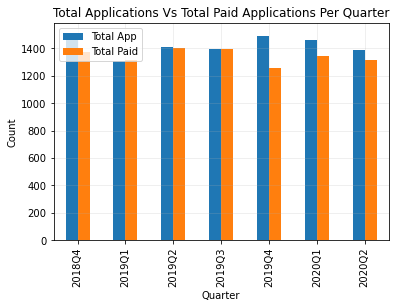

In [41]:
newdf=combineddata[["Total App", "Total Paid"]]
newdf.plot.bar()
plt.title("Total Applications Vs Total Paid Applications Per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Count")
plt.legend(loc="best")
plt.grid(alpha=0.25)
plt.savefig("Bargraph-Total App Vs Total Paid Per Quarter")